# Homework 4

# Problem 1


Data:	
cascades_swe.xlsx
The data in the first three columns are values for total precipitation (mm), daily maximum temperature (°C ), and daily minimum temperature (°C) averaged from October-March over the Pacific Northwest Cascades in WA in OR. The fourth column is an estimate of April 1 snow water equivalent (in mm, the water content of the snowpack) from model simulations, averaged over the same domain.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as st
import seaborn as sns

%matplotlib inline

## A. 

Calculate the long-term trend in April 1 SWE from 1916-2003 by fitting a linear model to the data. Estimate the uncertainty in the trend by evaluating a 95% confidence interval around the estimate of B1. That is:

Trend = X ± Y

Is the trend statistically significant with 95% confidence? I.e. can we reject the null hypothesis that the trend is equal to zero?

In [2]:
df_1=pd.read_excel('cascades_swe.xlsx')

In [3]:
cols=['year','precip','tmax','tmin','SWE']
df_cas=df_1.iloc[8:,1:6].copy()
df_cas.columns=cols
df_cas=df_cas.reset_index()
df_cas=df_cas.drop(columns='index')
df_cas['year']=df_cas['year'].astype(int)
df_cas['SWE']=df_cas['SWE'].astype(float)
df_cas.head()

,year,precip,tmax,tmin,SWE
0,1916,1154.57,5.03776,-5.06206,393.719
1,1917,820.952,4.56727,-6.50644,377.514
2,1918,1095.65,7.86584,-3.23471,310.131
3,1919,1041.05,5.80953,-4.22977,287.759
4,1920,817.106,5.14475,-5.36376,237.118


In [4]:
n = df_cas['year'].size
Bv2 = np.polyfit(df_cas['year'],df_cas['SWE'],1)
print(Bv2)

x = np.linspace(np.min(df_cas['year']), np.max(df_cas['year']),n)
y = Bv2[1] + Bv2[0]*x

[-5.85100129e-01  1.41575367e+03]


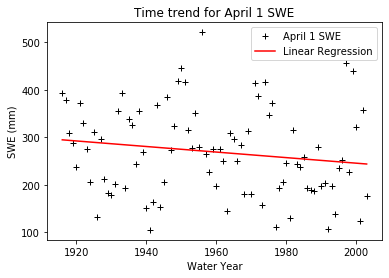

In [5]:
#fit the linear regression model

plt.plot(df_cas['year'],df_cas['SWE'],'k+',label='April 1 SWE')
plt.plot(x,y,'r-',label='Linear Regression');
plt.xlabel('Water Year')
plt.ylabel('SWE (mm)')
plt.title('Time trend for April 1 SWE')
plt.legend()

In [6]:
#Adapted from Lab 4.1 for the mann kendall test

def mann_kendall(V,alpha):
    '''Mann Kendall Test (adapted from original Matlab function)
       Performs original Mann-Kendall test of the null hypothesis of trend absence in the vector V,  
       against the alternative of trend.
       The result of the test is returned in H = False indicates a rejection of the null hypothesis at 
       the alpha significance level. 
       H = True indicates a failure to reject the null hypothesis at the alpha significance level.
       
       INPUTS:
       V = time series [vector]
       alpha =  significance level of the test [scalar] (i.e. for 95% confidence, alpha=0.05)
       OUTPUTS:
       H = test result [1] Reject of Null Hypthesis [0] Insufficient evidence to reject the null hypothesis
       p_value = p-value of the test
       
       From Original Matlab Help Documentation:
       The significance level of a test is a threshold of probability a agreed
       to before the test is conducted. A typical value of alpha is 0.05. If the p-value of a test is less than alpha,
       the test rejects the null hypothesis. If the p-value is greater than alpha, there is insufficient evidence 
       to reject the null hypothesis. 
       The p-value of a test is the probability, under the null hypothesis, of obtaining a value
       of the test statistic as extreme or more extreme than the value computed from
       the sample.
       
       References 
       Mann, H. B. (1945), Nonparametric tests against trend, Econometrica, 13, 245-259.
       Kendall, M. G. (1975), Rank Correlation Methods, Griffin, London.
       
       Original written by Simone Fatichi - simonef@dicea.unifi.it
       Copyright 2009
       $Date: 2009/10/03 $
       modified: E.I. (1/12/2012)
       modified for python: Steven Pestana - spestana@uw.edu (10/17/2019)
       '''
    
    V = np.reshape(V, len(V), 1)
    alpha = alpha/2
    n = len(V)
    S = 0

    for i in range(0, n-1):
        for j in range(i+1, n):
            if V[j]>V[i]:
                S = S+1
            if V[j]<V[i]:
                S = S-1

    VarS = (n*(n-1)*(2*n+5))/18
    StdS = np.sqrt(VarS)
    # Ties are not considered

    # Kendall tau correction coefficient
    Kendall_Tau = S/(n*(n-1)/2)
    if S>=0:
        if S==0:
             Z = 0
        else:
            Z = ((S-1)/StdS)
    else:
        Z = (S+1)/StdS

    Zalpha = st.norm.ppf(1-alpha,0,1)
    p_value = 2*(1-st.norm.cdf(abs(Z), 0, 1)) #Two-tailed test p-value

    H = abs(Z) > Zalpha
    
    return H, p_value

In [7]:
alpha = 0.05

H, p_value = mann_kendall(df_cas['SWE'],alpha)
print('Can we reject the null hypothesis at 95% confidence for April 1 SWE trend?\n{}\n'.format(H))

Can we reject the null hypothesis at 95% confidence for April 1 SWE trend?
False



## B.

Repeat this analysis for only the more recent period 1950-2003.

In [8]:
df_rec=df_cas[df_cas['year']>=1950]
df_rec=df_rec.reset_index()
df_rec=df_rec.drop(columns='index')

[-1.73900705e+00  3.70328747e+03]


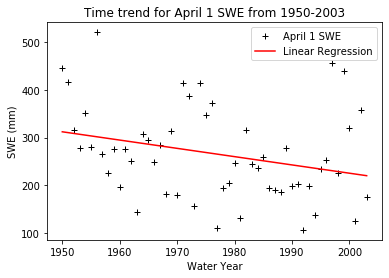

In [9]:
n = df_rec['year'].size
Bv2 = np.polyfit(df_rec['year'],df_rec['SWE'],1)
print(Bv2)

x = np.linspace(np.min(df_rec['year']), np.max(df_rec['year']),n)
y = Bv2[1] + Bv2[0]*x

#fit & plot the linear regression model

plt.plot(df_rec['year'],df_rec['SWE'],'k+',label='April 1 SWE')
plt.plot(x,y,'r-',label='Linear Regression');
plt.xlabel('Water Year')
plt.ylabel('SWE (mm)')
plt.title('Time trend for April 1 SWE from 1950-2003')
plt.legend()

In [10]:
#Analysis on the trend for the recent period

alpha = 0.05

H, p_value = mann_kendall(df_rec['SWE'],alpha)
print('Can we reject the null hypothesis at 95% confidence for April 1 SWE trend in more recent period?\n{}\n'.format(H))

Can we reject the null hypothesis at 95% confidence for April 1 SWE trend in more recent period?
True



# Problem 2

Continue using the cascades_swe dataset for this problem. Begin by making scatterplots of each of these variables vs. all the other variables. One nice way to do this is as illustrated in Helsel and Hirsch Figure 2.39 on page 61 – this is not required, you can plot in whatever way works best for you.

## A.

Calculate the correlation (R) between April 1 SWE and the three meteorological variables (precipitation, max. temperature and min. temperature), and also between all unique combinations of the meteorological variables.

In [11]:
df_cas['tmax']=df_cas['tmax'].astype(float)
df_cas['tmin']=df_cas['tmin'].astype(float)
df_cas['precip']=df_cas['precip'].astype(float)

In [12]:
R, P = st.pearsonr(df_cas['SWE'],df_cas['precip'])
print('R between SWE and precipitation = ', R)

R, P = st.pearsonr(df_cas['SWE'],df_cas['tmax'])
print('R between SWE and tmax = ', R)

R, P = st.pearsonr(df_cas['SWE'],df_cas['tmin'])
print('R between SWE and tmin = ', R)

R between SWE and precipitation =  0.8116677451125421
R between SWE and tmax =  -0.6047553276807376
R between SWE and tmin =  -0.3232389456862456


In [13]:
#display the R between different viriables
df_cas.corr()

,year,precip,tmax,tmin,SWE
year,1.000000,0.054130,0.240112,0.431544,-0.160357
precip,0.054130,1.000000,-0.234640,0.144022,0.811668
tmax,0.240112,-0.234640,1.000000,0.815999,-0.604755
tmin,0.431544,0.144022,0.815999,1.000000,-0.323239
SWE,-0.160357,0.811668,-0.604755,-0.323239,1.000000


Text(0.5, 1, 'Scatter matrix for variables')

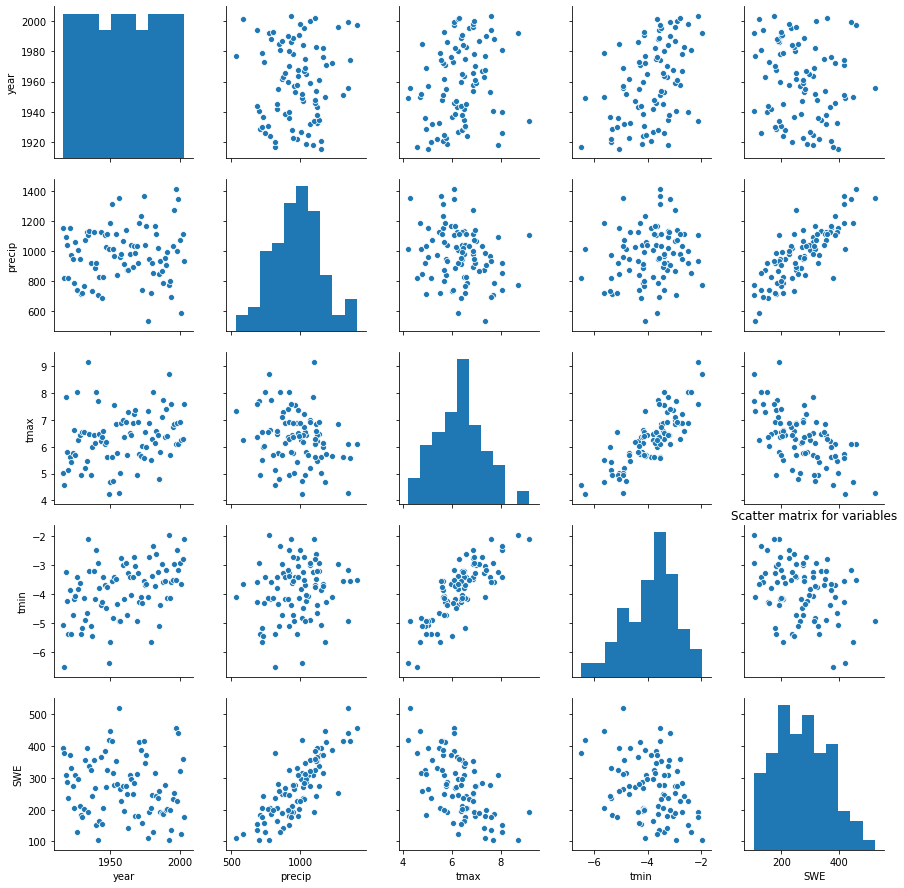

In [14]:
sns.pairplot(df_cas)
plt.title('Scatter matrix for variables')

## B.

Calculate the autocorrelation in precipitation, maximum temperature and minimum temperature. Can we consider each of these values to be an independent sample? Or do some of them depend on the prior year’s sample?
       
       Note: We can test for autocorrelation at different lags, but not for any lag longer than a quarter of the length of the data series. Therefore, test for lags from 1 to N/4, where N is the length of the data series. Determine at which of these lags the autocorrelation is different than 0 with 95% confidence.

In [36]:
n=df_cas.shape[0]
n

88

In [41]:
# Test function
print('autocorrelation in precipitation=',df_cas['precip'].autocorr(lag=4))
print('autocorrelation in tmax=',df_cas['tmax'].autocorr(lag=4))
print('autocorrelation in tmin=',df_cas['tmin'].autocorr(lag=4))

autocorrelation in precipitation= -0.06716010336815563
autocorrelation in tmax= 0.08085253078712676
autocorrelation in tmin= -0.010973982005288279


In [46]:
df_corr=pd.DataFrame(columns=['lag','corr_precip','corr_tmax','corr_tmin'])

In [47]:
for i in range(1,23):
    df_corr.loc[i-1,'lag']=i
    df_corr.loc[i-1,'corr_precip']=df_cas['precip'].autocorr(lag=i)
    df_corr.loc[i-1,'corr_tmax']=df_cas['tmax'].autocorr(lag=i)
    df_corr.loc[i-1,'corr_tmin']=df_cas['tmin'].autocorr(lag=i)

Text(0.5, 1.0, 'Autocorrelation for different lag periods')

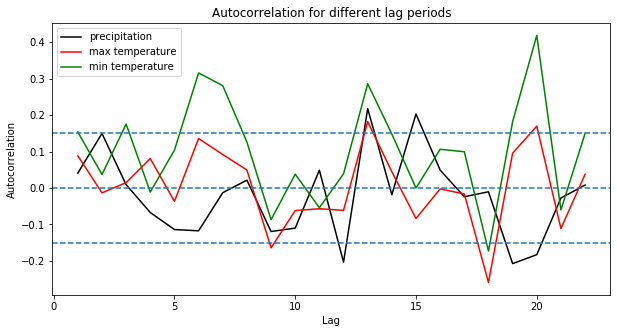

In [64]:
plt.figure(figsize=(10,5))
plt.plot(df_corr['lag'],df_corr['corr_precip'],'k-',label='precipitation')
plt.plot(df_corr['lag'],df_corr['corr_tmax'],'r-',label='max temperature')
plt.plot(df_corr['lag'],df_corr['corr_tmin'],'g-',label='min temperature')
plt.legend()
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.axhline(0,linestyle='--')
plt.axhline(-0.15,linestyle='--')
plt.axhline(0.15,linestyle='--')
plt.title('Autocorrelation for different lag periods')

According to the graph above, min temperature seems more correlating to itself around lag = 20.

Also considering the whole trend we can tell that around lag = 6 and 13 the three variables are correlating more to each other.

If we set the 0.15 correlation on the graph the independency is better explained.

## C.

Fit a multiple linear regression model to the data, using all three meteorological variables to predict April 1 SWE. Also calculate the trend in each meteorological variable. Estimate the overall trend in SWE, and trend due to each meteorological variable alone. How much of the overall trend is due to the combined effects of trends in both tmax and tmin?

In [15]:
from scipy.linalg import lstsq

In [68]:
Xmulti = np.array([df_cas['precip'],
                   df_cas['tmin'],
                   df_cas['tmax'],
                   np.ones_like(df_cas['precip'])]).T
print(Xmulti.shape)
print(df_cas['SWE'].shape)

(88, 4)
(88,)


In [69]:
B, res, rnk, s = lstsq(Xmulti, df_cas['SWE'])
print(B)

[   0.42624695  -30.78416812  -14.94082787 -171.79493474]


The trend for precipitation=  [   0.42175141 -142.97260673]
The trend for tmin=  [-31.67642618 146.86704948]
The trend for tmax=  [-57.9416627  635.75637802]


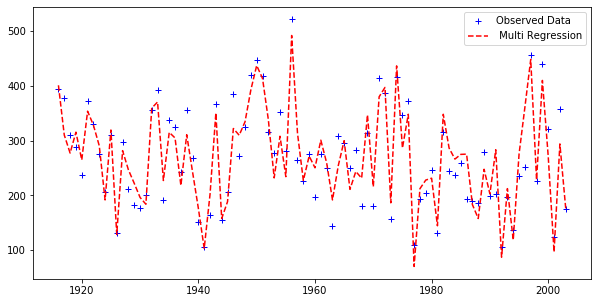

In [66]:
plt.figure(figsize=(10,5))
plt.plot(df_cas['year'],df_cas['SWE'],'b+', label='Observed Data');
plt.plot(df_cas['year'],Xmulti.dot(B),'r--', label=' Multi Regression')

#Trend for precip
n = df_cas['year'].size
Bv2 = np.polyfit(df_cas['precip'],df_cas['SWE'],1)
print('The trend for precipitation= ', Bv2)

x = np.linspace(np.min(df_cas['year']), np.max(df_cas['year']),n)
y = Bv2[1] + Bv2[0]*x

#plt.plot(x,y,'k--',label='Linear Regression');

#Trend for tmin
n = df_cas['year'].size
Bv2 = np.polyfit(df_cas['tmin'],df_cas['SWE'],1)
print('The trend for tmin= ', Bv2)

x = np.linspace(np.min(df_cas['year']), np.max(df_cas['year']),n)
y = Bv2[1] + Bv2[0]*x

#plt.plot(x,y,'b--',label='Linear Regression');

#Trend for tmax
n = df_cas['year'].size
Bv2 = np.polyfit(df_cas['tmax'],df_cas['SWE'],1)
print('The trend for tmax= ', Bv2)

x = np.linspace(np.min(df_cas['year']), np.max(df_cas['year']),n)
y = Bv2[1] + Bv2[0]*x

#plt.plot(x,y,'g--',label='Linear Regression');

plt.legend()

In [33]:
print(-14.94082787-171.79493474,'trend is due to the combination of tmin and tmax')

-186.73576261 trend is due to the combination of tmin and tmax


## D. 

Finally carry out a Mann-Kendall test on the 1950-2003 April 1 SWE data. Is the trend significant according to this test? Compare your answer with your regression analysis for the same data in Problem 2B.

      Note, for this problem you do not need to worry about the tie statistic.

In [19]:
#Analysis on the trend for the recent period

alpha = 0.05

H, p_value = mann_kendall(df_rec['SWE'],alpha)
print('Can we reject the null hypothesis at 95% confidence for April 1 SWE trend in more recent period?\n{}\n'.format(H))

Can we reject the null hypothesis at 95% confidence for April 1 SWE trend in more recent period?
True



The results from these two tests are the same. This suggests that these different tests yield the same result.

# Problem 3: Calculating a rating curve and associated uncertainty

Download Tuolumne_120_stage_Q_2002_2018_forclass.csv (also available in the data folder or the Homework 4 folder on the class Canvas website). Make a scatter plot of stage (in cm) vs. discharge (in cms). You may want to look at Venetis_1970.pdf (also available in the Readings/Rating_Curve_Analysis folder on Canvas).

Data:	
Tuolumne_120_stage_Q_2002_2018_forclass.csv
Resources:	
Venetis_1970_log_discharge_uncertainty.pdf
Plot the data, assume that h0 =70 cm, the stage height at which flow stops. This is a guess, but for now, we’ll assume this is truth. Use linear regression with transformed variables to fit an equation of the form Q=a(h-h0)b to the data, to determine a and b, where Q is discharge in cms, and h is stage in cm. Determine 95% confidence intervals for b (note this corresponds to B1 in class lecture) and for log(Q). Transform the mean, upper, and lower confidence intervals for log(Q) back to Q, and plot the rating curve with confidence intervals and the original data.

Now, assume that we don’t know at what level flow stops. Repeat the above for h0 = 60, 65, 70, 75, and 80 cm. Recalculate a, b, log(Q), and Q for each of these. Don’t worry about 95% uncertainty in this example. Make a plot showing stage (h) vs. Q for each of these 5 cases. Is the range between these 5 lines larger or smaller than the range between the 95% confidence lines that you generated before? Note that we did not explicitly account for uncertainty in h0 in generating those 95% confidence lines. Based on what you have plotted here, is that an okay thing to do or not?

The data provided in the file also have uncertainty associated with them. Describe in a couple sentences how you would account for this uncertainty. (Note that you do not need to do more calculations. Just write a couple sentences about things you might do.)

In [20]:
df_t=pd.read_csv('Tuolumne120_stage_Q_2002_2018_forclass.csv')

In [21]:
df_t.columns=['time','ms_cm','ms_ft','discharge_cfs','discharge_m3s']
df_t.head()

,time,ms_cm,ms_ft,discharge_cfs,discharge_m3s
0,6/20/03 16:40,153.54,5.04,417.30,11.814890
1,6/20/03 16:47,153.54,5.04,422.20,11.953623
2,6/20/03 18:59,153.54,5.04,424.00,12.004585
3,7/1/03 18:20,128.24,4.21,242.00,6.851674
4,7/9/03 18:37,115.18,3.78,139.03,3.936315


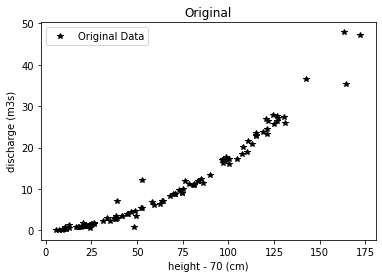

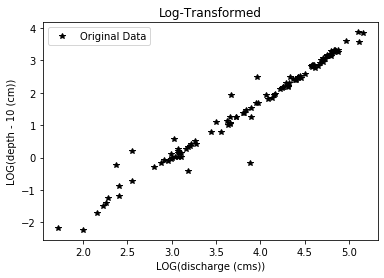

In [22]:
h0=70
plt.figure()
diff = df_t['ms_cm']-h0
plt.plot(diff, df_t['discharge_m3s'], 'k*', label='Original Data')
plt.ylabel('discharge (m3s)')
plt.xlabel('height - 70 (cm)')
plt.legend(loc='best')
plt.title('Original')

plt.figure()
diff_logs = np.log(diff)
Qobs_logs = np.log(df_t['discharge_m3s'])
plt.plot(diff_logs, Qobs_logs, 'k*', label='Original Data')
plt.xlabel('LOG(discharge (cms))')
plt.ylabel('LOG(depth - 10 (cm))');
plt.legend(loc='best')
plt.title('Log-Transformed');

In [23]:
P = np.polyfit(diff_logs, Qobs_logs, 1)
print(P)
Yest = np.polyval(P,diff_logs)

[ 1.74990252 -5.23632163]


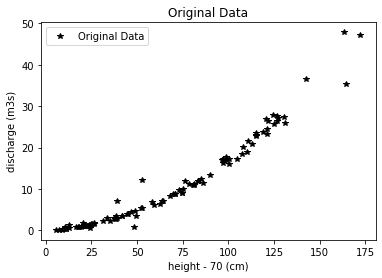

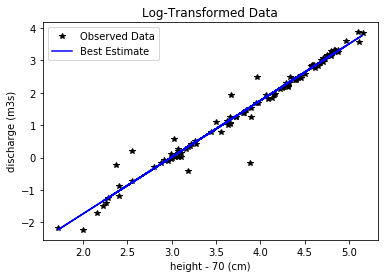

In [24]:
plt.figure()
diff = df_t['ms_cm']-h0
plt.plot(diff, df_t['discharge_m3s'], 'k*', label='Original Data')
plt.ylabel('discharge (m3s)')
plt.xlabel('height - 70 (cm)')
plt.legend(loc='best')
plt.title('Original Data')

plt.figure()
plt.plot(diff_logs, Qobs_logs, 'k*', label='Observed Data')
plt.plot(diff_logs,Yest,'b', label='Best Estimate')
plt.ylabel('discharge (m3s)')
plt.xlabel('height - 70 (cm)')
plt.legend(loc='best')
plt.title('Log-Transformed Data');

In [26]:
# Now, we can find the confidence intervals exactly as we did in lab 3.4
# create series of new test x-values to predict for
x = diff_logs
p_x = np.arange(np.min(x),np.max(x)+1,1)

y_err= Yest-Qobs_logs
# now calculate confidence intervals for new test x-series
mean_x = np.mean(x)                 # mean of x
n = x.size                          # number of samples in origional fit
t = st.t.ppf(0.975, n-2)             # appropriate t value (for n, and two tailed 95%)        
sse = np.sum(y_err**2)              # sum of the squares of the residuals
st_err = np.sqrt(sse/(n-2))         # standard error

sigma = st_err**2 * (1 + 1/n + ( ( n*(p_x-mean_x)**2 ) / ( n*np.sum(x**2) - np.sum(x)**2 ) ) )
confs = t * np.sqrt(sigma)

# now predict y based on test x-values, using the coefficients we calculated above
p_y = P[0]*p_x+P[1]
# get lower and upper confidence limits based on predicted y and confidence intervals
lower = p_y - np.abs(confs)
upper = p_y + np.abs(confs)

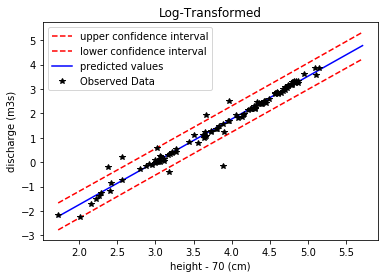

In [27]:
plt.plot(p_x,lower,'r--', label='upper confidence interval')
plt.plot(p_x,upper,'r--', label='lower confidence interval')
plt.plot(p_x,p_y,'b', label='predicted values')
plt.plot(diff_logs, Qobs_logs, 'k*', label='Observed Data')
plt.ylabel('discharge (m3s)')
plt.xlabel('height - 70 (cm)')
plt.legend(loc='best')
plt.title('Log-Transformed');

(0, 200)

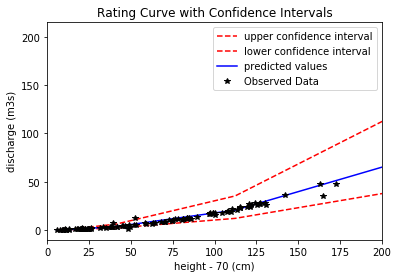

In [28]:
# The final step is to un-transform all of the data in the above graph.
plt.plot(np.exp(p_x),np.exp(lower),'r--', label='upper confidence interval')
plt.plot(np.exp(p_x),np.exp(upper),'r--', label='lower confidence interval')
plt.plot(np.exp(p_x),np.exp(p_y),'b', label='predicted values')
plt.plot(np.exp(diff_logs), np.exp(Qobs_logs), 'k*', label='Observed Data')
plt.ylabel('discharge (m3s)')
plt.xlabel('height - 70 (cm)')
plt.legend(loc='best')
plt.title('Rating Curve with Confidence Intervals');
axes = plt.gca() 
plt.xlim(0,200)